# Algorithm Comparison

Objectives:
- Compare accuracy of 5 different algos for the same dataset
   - Decision Tree 
   -  Naive Bayes
   - KNN 
   - Random Forest 
   - SVM

## Import Necessay Packages

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the data in
  

In [295]:
df = pd.read_csv("stroke_data.csv")
#take a look at the dataset
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## Data Exploration

In [296]:
#shape of data
df.shape

(5110, 12)

In [297]:
#statistical description of data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [298]:
#check for total missing cells
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [299]:
#checking for significance of missing cells 
df['bmi'].isna().sum()/(len(df))*100

3.9334637964774952

In [300]:
df['stroke'].unique()

array([1, 0])

In [301]:
#replace missing cells with mean
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)

In [302]:
df.groupby('stroke').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36487.236371,41.971545,0.088871,0.047110,104.795513,28.825612
1,37115.068273,67.728193,0.265060,0.188755,132.544739,30.218876


Based on the data, it appears that individuals who have had a stroke tend to have a higher average than those who have not.

<Figure size 864x432 with 0 Axes>

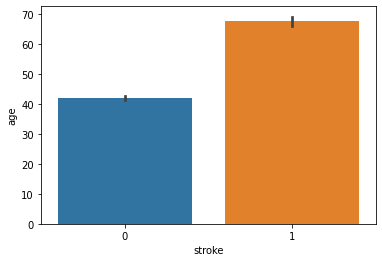

<Figure size 864x432 with 0 Axes>

In [303]:
sns.barplot(data=df,y="age",x="stroke")
plt.figure(figsize=(12,6))

The data suggests that older individuals are more prone to suffering from strokes compared to their younger counterparts.

<Figure size 864x432 with 0 Axes>

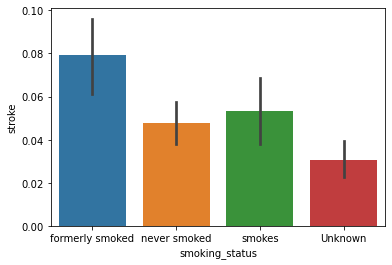

<Figure size 864x432 with 0 Axes>

In [304]:
sns.barplot(data=df,x="smoking_status",y="stroke")
plt.figure(figsize=(12,6))

The barplot indicates that individuals who smoke or have a history of smoking have a greater likelihood of experiencing a stroke.

<Figure size 864x1152 with 0 Axes>

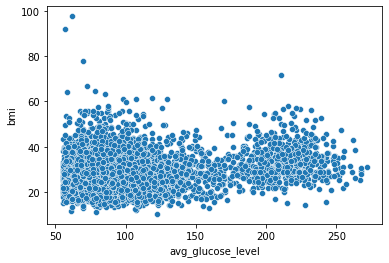

<Figure size 864x1152 with 0 Axes>

In [305]:
sns.scatterplot(data=df,x="avg_glucose_level",y="bmi")
plt.figure(figsize=(12,16))

<Figure size 864x1152 with 0 Axes>

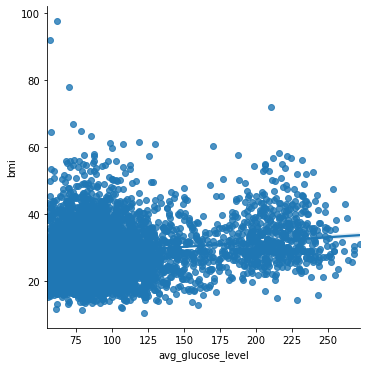

<Figure size 864x1152 with 0 Axes>

In [306]:
sns.lmplot(data=df,x="avg_glucose_level",y="bmi")
plt.figure(figsize=(12,16))

The scatterplot reveals a positive correlation between glucose level and BMI, meaning that as glucose intake increases, so does BMI.

# Pre-processing

let's select some features to explore more
- <b>X</b> as the feature matrix
- <b>Y</b> as the resonse vector(target)

In [307]:
X = df.drop(['id','ever_married','work_type','stroke'],axis=1)
X = X.values
X[0:5]

array([['Male', 67.0, 0, 1, 'Urban', 228.69, 36.6, 'formerly smoked'],
       ['Female', 61.0, 0, 0, 'Rural', 202.21, 28.9, 'never smoked'],
       ['Male', 80.0, 0, 1, 'Rural', 105.92, 32.5, 'never smoked'],
       ['Female', 49.0, 0, 0, 'Urban', 171.23, 34.4, 'smokes'],
       ['Female', 79.0, 1, 0, 'Rural', 174.12, 24.0, 'never smoked']],
      dtype=object)

In [308]:
from sklearn import preprocessing
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['Male', 'Female','Other'])
X[:,0] = le_gender.transform(X[:,0]) 


le_smoking = preprocessing.LabelEncoder()
le_smoking.fit(['formerly smoked','never smoked','smokes','Unknown'])
X[:,7] = le_smoking.transform(X[:,7])

le_rtype = preprocessing.LabelEncoder()
le_rtype.fit(['Urban','Rural'])
X[:,4] = le_rtype.transform(X[:,4]) 

X[0:5]

array([[1, 67.0, 0, 1, 1, 228.69, 36.6, 1],
       [0, 61.0, 0, 0, 0, 202.21, 28.9, 2],
       [1, 80.0, 0, 1, 0, 105.92, 32.5, 2],
       [0, 49.0, 0, 0, 1, 171.23, 34.4, 3],
       [0, 79.0, 1, 0, 0, 174.12, 24.0, 2]], dtype=object)

In [309]:
Y =df['stroke'].values
Y[0:5]

array([1, 1, 1, 1, 1])

# Decision Tree 
- A hierarchical tree-like structure called a decision tree is used for both classification and regression tasks in non-parametric supervised learning algorithms. It includes a root node, branches, internal nodes, and leaf nodes.
- The decision tree operates by decreasing the entropy (i.e. randomness) in each node of the tree to achieve pure nodes and maximize information gain.

In [310]:
#import the train_test split to obtain our training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print("train shape:",x_train.shape,y_train.shape)
print("test shape:",x_test.shape,y_test.shape)

train shape: (4088, 8) (4088,)
test shape: (1022, 8) (1022,)


## Modeling 

In [311]:
#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy",max_depth=3)
Tree

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [312]:
#train the model 
Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Prediction

In [313]:
#Make predictions
predtree = Tree.predict(x_test)
print(predtree[0:10])
print([y_test[0:10]])

[0 0 0 0 0 0 0 0 0 0]
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]


## Evaluation

In [314]:
#Accuracy Score
print("DecisionTree's Accuracy:" ,Tree.score(x_test,y_test))

DecisionTree's Accuracy: 0.9500978473581213


## Visualization

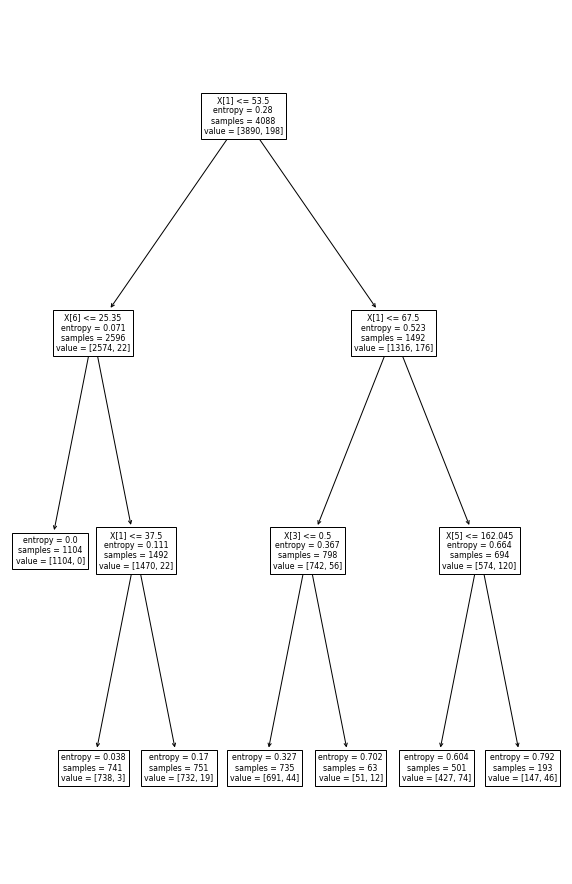

In [315]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,16))
plot_tree(Tree)
plt.show()

# K-Nearest Neighbors
- K-Nearest Neighbors is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

## Data Normalization

In [316]:
from sklearn import preprocessing
Scale = preprocessing.StandardScaler()
X_data = Scale.fit(X).transform(X.astype (float))
X_data[0:5]

array([[ 1.18807255e+00,  1.05143428e+00, -3.28601864e-01,
         4.18503199e+00,  9.84079744e-01,  2.70637544e+00,
         1.00119944e+00, -3.51780710e-01],
       [-8.40343999e-01,  7.86070073e-01, -3.28601864e-01,
        -2.38946800e-01, -1.01617781e+00,  2.12155854e+00,
         8.44074468e-04,  5.81552327e-01],
       [ 1.18807255e+00,  1.62639008e+00, -3.28601864e-01,
         4.18503199e+00, -1.01617781e+00, -5.02830130e-03,
         4.68542686e-01,  5.81552327e-01],
       [-8.40343999e-01,  2.55341649e-01, -3.28601864e-01,
        -2.38946800e-01,  9.84079744e-01,  1.43735810e+00,
         7.15383620e-01,  1.51488536e+00],
       [-8.40343999e-01,  1.58216271e+00,  3.04319637e+00,
        -2.38946800e-01, -1.01617781e+00,  1.50118442e+00,
        -6.35745702e-01,  5.81552327e-01]])

## Train/test split

In [317]:
#split data fror training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y,test_size=0.2,random_state=4)

## Modeling

### import library

In [318]:
from sklearn.neighbors import KNeighborsClassifier

### Training

In [319]:
#number of k neareat data points 
k=4
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

### Predicting

We can use the model to make predictions on the test set:

In [320]:
Y_pred = neigh.predict(X_test)
print(Y_pred[0:10])
print([Y_test[0:10]])

[0 0 0 0 0 0 0 0 0 0]
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]


### Accuracy evaluation

In [321]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Train set Accuracy:  0.9535225048923679
Test set Accuracy:  0.9452054794520548


# Random Forest Classifier
- Random Forest Regression is a popular machine learning algorithm that combines multiple decision trees to make predictions. It can handle high-dimensional data, missing values, and outliers, and is robust to overfitting. The algorithm is powerful and flexible, making it suitable for various regression tasks, including prediction and feature selection.

In [322]:
#import classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=250)
#train the model
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=250)

### Predictions

In [323]:
#make predictions
predictions = model.predict(x_test)
print(predictions[0:10])
print([y_test[0:10]])

[0 0 0 0 0 0 0 0 0 0]
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]


### Evaluation

In [324]:
#import the accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)


0.9481409001956947

# Support Vector Machine
- Support Vector Machine (SVM) is a type of supervised machine learning algorithm that is capable of performing classification or regression tasks by creating a boundary that divides data into two distinct categories. This boundary is known as a "divider" or a "hyperplane", and the optimal location for it is determined by ensuring that it is equidistant from the boundaries of each group. SVM is a popular choice for various applications because it can effectively handle complex datasets and produce accurate results.

In [325]:
#import SVC
from sklearn.svm import SVC
#instantiate 
model = SVC(kernel='linear',C=1)

In [326]:
#train the model
model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [327]:
pred = model.predict(x_test)
print(pred[:100])
print("\n")
print(y_test[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [328]:
#check accuracy
model.score(x_test,y_test)

0.9500978473581213

# Naive Bayes

In [329]:
#import classifier
from sklearn.naive_bayes import GaussianNB

In [330]:
#create a Gaussian Naive Bayes Classifier
models = GaussianNB()

In [331]:
#train the model
models.fit(x_train,y_train)

GaussianNB()

In [332]:
yhat = models.predict(x_test)
print(yhat[:100])
print("\n")
print(y_test[:100])

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [333]:
models.score(x_test,y_test)

0.8894324853228963

# Sumarry

In [334]:
print("DecisionTree's Accuracy:%.2f" %Tree.score(x_test,y_test))
print("KNN Test set Accuracy: %.2f" % metrics.accuracy_score(Y_test, Y_pred))
print("Random Forest Accuracy:%.2f" %accuracy_score(y_test, predictions))
print("SVM Accuracy:%.2f" %model.score(x_test,y_test))
print("Naive Bayes Accuracy:%.2f" %models.score(x_test,y_test))

DecisionTree's Accuracy:0.95
KNN Test set Accuracy: 0.95
Random Forest Accuracy:0.95
SVM Accuracy:0.95
Naive Bayes Accuracy:0.89
